### Problem Statement :

A US-based housing company named Surprise Housing has decided to enter the Australian market.
The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. The
company wants to know

* Which variables are significant in predicting the price of a house, and
* How well those variables describe the price of a house.

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.


## Step 1: Reading and Understanding the Data



In [29]:
# Importing all required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.figure import Figure
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.metrics import  mean_squared_error
from matplotlib.figure import Figure
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset

housingInfo = pd.read_csv('train.csv')
housingInfo.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
# inspect housingInfo dataframe

print("*********************************  Info *******************************************")
print(housingInfo.info())
print("*********************************  Shape ******************************************")
print(housingInfo.shape)
print("**************************** Columns having null values *****************************")
print(housingInfo.isnull().any())
print("**************************** Describe *****************************")
housingInfo.describe()

*********************************  Info *******************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle  

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

## Step 2: Data Cleaning

#### Removing/Imputing NaN values in Categorical attributes

In [4]:
# check for null values in all categorical columns

housingInfo[housingInfo.columns[housingInfo.isnull().any()]].isnull().sum()/housingInfo.shape[0] * 100

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [5]:
#Drop the column with more than 90% value as NA
housingInfo=housingInfo.drop(['PoolQC','MiscFeature','Alley','Id'],axis=1)

In [6]:
housingInfo.select_dtypes(include='object').isnull().sum()[housingInfo.select_dtypes(include='object').isnull().sum()>0]

MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
Fence           1179
dtype: int64

In [7]:
# Replace NA with None in the following columns below for categorical varibale:

for col in ('MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu',
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'Fence',  'Electrical'):

  housingInfo[col]=housingInfo[col].fillna('None')


#### Remove categorical attributes that have more than 85% data associated to one value.

    - We will remove any column that has one value repeating 1241 times (1241/1450)*100 = 85%) as this column would be skewed
      to one value

In [8]:
# Drop the following columns that have more than 85% values associated to a specific value

# Method to get the column names that have count of one value more than 85%

def getHighCategoricalValueCounts():
    column = []
    categorical_columns = housingInfo.select_dtypes(include=['object'])
    for col in (categorical_columns):
        if(housingInfo[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighCategoricalValueCounts()

columnsToBeRemoved

# Remove the columns with skewed data

housingInfo.drop(columnsToBeRemoved, axis = 1, inplace = True)

housingInfo.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
0          60       RL         65.0     8450      Reg    Inside      CollgCr   
1          20       RL         80.0     9600      Reg       FR2      Veenker   
2          60       RL         68.0    11250      IR1    Inside      CollgCr   
3          70       RL         60.0     9550      IR1    Corner      Crawfor   
4          60       RL         84.0    14260      IR1       FR2      NoRidge   

  BldgType HouseStyle  OverallQual  ...  EnclosedPorch  3SsnPorch  \
0     1Fam     2Story            7  ...              0          0   
1     1Fam     1Story            6  ...              0          0   
2     1Fam     2Story            7  ...              0          0   
3     1Fam     2Story            7  ...            272          0   
4     1Fam     2Story            8  ...              0          0   

   ScreenPorch PoolArea Fence MiscVal MoSold  YrSold SaleCondition SalePrice  
0            0        0  None       0      2    2008        Normal    208500  
1            0        0  None       0      5    2007        Normal    181500  
2            0        0  None       0      9    2008        Normal    223500  
3            0        0  None       0      2    2006       Abnorml    140000  
4            0        0  None       0     12    2008        Normal    250000  

[5 rows x 59 columns]

In [9]:
# once again check for null values in all categorical columns

housingInfo.select_dtypes(include='object').isnull().sum()[housingInfo.select_dtypes(include='object').isnull().sum()>0]

Series([], dtype: int64)

No more null values in the categorical variables

#### Removing null values in Numerical attributes

In [10]:
# check the null values in the numerical data

housingInfo.select_dtypes(include=['int64','float']).isnull().sum()[housingInfo.select_dtypes(include=['int64','float']).isnull()
                                                                  .sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [11]:
# Impute the null values with median values for LotFrontage and MasVnrArea columns

housingInfo['LotFrontage'] = housingInfo['LotFrontage'].replace(np.nan, housingInfo['LotFrontage'].median())
housingInfo['MasVnrArea'] = housingInfo['MasVnrArea'].replace(np.nan, housingInfo['MasVnrArea'].median())

In [12]:
# Setting the null values with 0 for GarageYrBlt for now as we would be handling this column further below

housingInfo['GarageYrBlt']=housingInfo['GarageYrBlt'].fillna(0)
housingInfo['GarageYrBlt'] = housingInfo['GarageYrBlt'].astype(int)

In [13]:
# Create a new column named age - This column would determine whether the house has been remodelled or not based on
# the difference between remodelled and built years

def checkForRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2

housingInfo['age'] = housingInfo.apply(checkForRemodel, axis=1)
housingInfo.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
0          60       RL         65.0     8450      Reg    Inside      CollgCr   
1          20       RL         80.0     9600      Reg       FR2      Veenker   
2          60       RL         68.0    11250      IR1    Inside      CollgCr   
3          70       RL         60.0     9550      IR1    Corner      Crawfor   
4          60       RL         84.0    14260      IR1       FR2      NoRidge   

  BldgType HouseStyle  OverallQual  ...  3SsnPorch  ScreenPorch  PoolArea  \
0     1Fam     2Story            7  ...          0            0         0   
1     1Fam     1Story            6  ...          0            0         0   
2     1Fam     2Story            7  ...          0            0         0   
3     1Fam     2Story            7  ...          0            0         0   
4     1Fam     2Story            8  ...          0            0         0   

  Fence MiscVal MoSold YrSold  SaleCondition SalePrice age  
0  None       0      2   2008         Normal    208500   0  
1  None       0      5   2007         Normal    181500   0  
2  None       0      9   2008         Normal    223500   1  
3  None       0      2   2006        Abnorml    140000   1  
4  None       0     12   2008         Normal    250000   0  

[5 rows x 60 columns]

In [14]:
# Create a new column named BuiltOrRemodelledAge and determine the age of the building at the time of selling

def getBuiltOrRemodelAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']

housingInfo['BuiltOrRemodelAge'] = housingInfo.apply(getBuiltOrRemodelAge, axis=1)
housingInfo.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
0          60       RL         65.0     8450      Reg    Inside      CollgCr   
1          20       RL         80.0     9600      Reg       FR2      Veenker   
2          60       RL         68.0    11250      IR1    Inside      CollgCr   
3          70       RL         60.0     9550      IR1    Corner      Crawfor   
4          60       RL         84.0    14260      IR1       FR2      NoRidge   

  BldgType HouseStyle  OverallQual  ...  ScreenPorch  PoolArea  Fence MiscVal  \
0     1Fam     2Story            7  ...            0         0   None       0   
1     1Fam     1Story            6  ...            0         0   None       0   
2     1Fam     2Story            7  ...            0         0   None       0   
3     1Fam     2Story            7  ...            0         0   None       0   
4     1Fam     2Story            8  ...            0         0   None       0   

  MoSold YrSold SaleCondition  SalePrice age BuiltOrRemodelAge  
0      2   2008        Normal     208500   0                 5  
1      5   2007        Normal     181500   0                31  
2      9   2008        Normal     223500   1                 6  
3      2   2006       Abnorml     140000   1                36  
4     12   2008        Normal     250000   0                 8  

[5 rows x 61 columns]

In [15]:
# Create a new column which would indicate if the Garage is old or new.
# Garage Yr Built less than 2000 will be considered as old (0) else new(1).
# For GarageYrBuilt , where we have imputed the value as 0 will also be treated as old.

def getGarageConstructionPeriod(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:
        return 0
    else:
        return 1

housingInfo['OldOrNewGarage'] = housingInfo['GarageYrBlt'].apply(getGarageConstructionPeriod)
housingInfo.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
0          60       RL         65.0     8450      Reg    Inside      CollgCr   
1          20       RL         80.0     9600      Reg       FR2      Veenker   
2          60       RL         68.0    11250      IR1    Inside      CollgCr   
3          70       RL         60.0     9550      IR1    Corner      Crawfor   
4          60       RL         84.0    14260      IR1       FR2      NoRidge   

  BldgType HouseStyle  OverallQual  ...  PoolArea  Fence  MiscVal MoSold  \
0     1Fam     2Story            7  ...         0   None        0      2   
1     1Fam     1Story            6  ...         0   None        0      5   
2     1Fam     2Story            7  ...         0   None        0      9   
3     1Fam     2Story            7  ...         0   None        0      2   
4     1Fam     2Story            8  ...         0   None        0     12   

  YrSold SaleCondition SalePrice  age BuiltOrRemodelAge OldOrNewGarage  
0   2008        Normal    208500    0                 5              1  
1   2007        Normal    181500    0                31              0  
2   2008        Normal    223500    1                 6              1  
3   2006       Abnorml    140000    1                36              0  
4   2008        Normal    250000    0                 8              1  

[5 rows x 62 columns]

In [16]:
# Since we have created new features from YearBuilt, YearRemodAdd, YrSold and GarageYrBlt, we can drop these columns as we
# would only be using the derived columns for further analysis

housingInfo.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

#### Remove numerical attributes that have more than 85% data associated to one value.

    - We will remove any column that has one value repeating 1241 times (1241/1450)*100 = 85%) as this column would be skewed
      to one value

In [17]:
## Drop the following columns that have more than 85% values associated to a specific value
# We will also drop MoSold as we will not be using that for further analysis

def getHighNumericalValueCounts():
    column = []
    numerical_columns = housingInfo.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(housingInfo[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighNumericalValueCounts()
housingInfo.drop(columnsToBeRemoved, axis = 1, inplace = True)
columnsToBeRemoved

housingInfo.drop(['MoSold'], axis = 1, inplace = True)

housingInfo.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
0          60       RL         65.0     8450      Reg    Inside      CollgCr   
1          20       RL         80.0     9600      Reg       FR2      Veenker   
2          60       RL         68.0    11250      IR1    Inside      CollgCr   
3          70       RL         60.0     9550      IR1    Corner      Crawfor   
4          60       RL         84.0    14260      IR1       FR2      NoRidge   

  BldgType HouseStyle  OverallQual  ...  GarageCars GarageArea WoodDeckSF  \
0     1Fam     2Story            7  ...           2        548          0   
1     1Fam     1Story            6  ...           2        460        298   
2     1Fam     2Story            7  ...           2        608          0   
3     1Fam     2Story            7  ...           3        642          0   
4     1Fam     2Story            8  ...           3        836        192   

  OpenPorchSF Fence  SaleCondition SalePrice age BuiltOrRemodelAge  \
0          61  None         Normal    208500   0                 5   
1           0  None         Normal    181500   0                31   
2          42  None         Normal    223500   1                 6   
3          35  None        Abnorml    140000   1                36   
4          84  None         Normal    250000   0                 8   

  OldOrNewGarage  
0              1  
1              0  
2              1  
3              0  
4              1  

[5 rows x 48 columns]

In [18]:
# check for percentage of null values in each column

percent_missing = round(100*(housingInfo.isnull().sum()/len(housingInfo.index)), 2)
print(percent_missing)

MSSubClass           0.0
MSZoning             0.0
LotFrontage          0.0
LotArea              0.0
LotShape             0.0
LotConfig            0.0
Neighborhood         0.0
BldgType             0.0
HouseStyle           0.0
OverallQual          0.0
OverallCond          0.0
RoofStyle            0.0
Exterior1st          0.0
Exterior2nd          0.0
MasVnrType           0.0
MasVnrArea           0.0
ExterQual            0.0
Foundation           0.0
BsmtQual             0.0
BsmtExposure         0.0
BsmtFinType1         0.0
BsmtFinSF1           0.0
BsmtUnfSF            0.0
TotalBsmtSF          0.0
HeatingQC            0.0
1stFlrSF             0.0
2ndFlrSF             0.0
GrLivArea            0.0
BsmtFullBath         0.0
FullBath             0.0
HalfBath             0.0
BedroomAbvGr         0.0
KitchenQual          0.0
TotRmsAbvGrd         0.0
Fireplaces           0.0
FireplaceQu          0.0
GarageType           0.0
GarageFinish         0.0
GarageCars           0.0
GarageArea           0.0


Hence there are no null values in the dataset

#### Check for Duplicates

In [19]:
# Check if there are any duplicate values in the dataset

housingInfo[housingInfo.duplicated(keep=False)]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, LotShape, LotConfig, Neighborhood, BldgType, HouseStyle, OverallQual, OverallCond, RoofStyle, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, Foundation, BsmtQual, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtUnfSF, TotalBsmtSF, HeatingQC, 1stFlrSF, 2ndFlrSF, GrLivArea, BsmtFullBath, FullBath, HalfBath, BedroomAbvGr, KitchenQual, TotRmsAbvGrd, Fireplaces, FireplaceQu, GarageType, GarageFinish, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, Fence, SaleCondition, SalePrice, age, BuiltOrRemodelAge, OldOrNewGarage]
Index: []

[0 rows x 48 columns]

No duplicate entries found !!!

In [20]:
housingInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 48 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MSSubClass         1460 non-null   int64  
 1   MSZoning           1460 non-null   object 
 2   LotFrontage        1460 non-null   float64
 3   LotArea            1460 non-null   int64  
 4   LotShape           1460 non-null   object 
 5   LotConfig          1460 non-null   object 
 6   Neighborhood       1460 non-null   object 
 7   BldgType           1460 non-null   object 
 8   HouseStyle         1460 non-null   object 
 9   OverallQual        1460 non-null   int64  
 10  OverallCond        1460 non-null   int64  
 11  RoofStyle          1460 non-null   object 
 12  Exterior1st        1460 non-null   object 
 13  Exterior2nd        1460 non-null   object 
 14  MasVnrType         1460 non-null   object 
 15  MasVnrArea         1460 non-null   float64
 16  ExterQual          1460 

#### Outlier Treatment

In [21]:
# Checking outliers at 25%,50%,75%,90%,95% and above

housingInfo.describe(percentiles=[.25,.5,.75,.90,.95,.99])

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    69.863699   10516.828082     6.099315     5.575342   
std      42.300571    22.027677    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    79.000000   11601.500000     7.000000     6.000000   
90%     120.000000    92.000000   14381.700000     8.000000     7.000000   
95%     160.000000   104.000000   17401.150000     8.000000     8.000000   
99%     190.000000   137.410000   37567.640000    10.000000     9.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

        MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF     1stFlrSF  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean    103.117123   443.639726   567.240411  1057.429452  1162.626712  ...   
std     180.731373   456.098091   441.866955   438.705324   386.587738  ...   
min       0.000000     0.000000     0.000000     0.000000   334.000000  ...   
25%       0.000000     0.000000   223.000000   795.750000   882.000000  ...   
50%       0.000000   383.500000   477.500000   991.500000  1087.000000  ...   
75%     164.250000   712.250000   808.000000  1298.250000  1391.250000  ...   
90%     335.000000  1065.500000  1232.000000  1602.200000  1680.000000  ...   
95%     456.000000  1274.000000  1468.000000  1753.000000  1831.250000  ...   
99%     791.280000  1572.410000  1797.050000  2155.050000  2219.460000  ...   
max    1600.000000  5644.000000  2336.000000  6110.000000  4692.000000  ...   

       TotRmsAbvGrd   Fireplaces   GarageCars   GarageArea   WoodDeckSF  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean       6.517808     0.613014     1.767123   472.980137    94.244521   
std        1.625393     0.644666     0.747315   213.804841   125.338794   
min        2.000000     0.000000     0.000000     0.000000     0.000000   
25%        5.000000     0.000000     1.000000   334.500000     0.000000   
50%        6.000000     1.000000     2.000000   480.000000     0.000000   
75%        7.000000     1.000000     2.000000   576.000000   168.000000   
90%        9.000000     1.000000     3.000000   757.100000   262.000000   
95%       10.000000     2.000000     3.000000   850.100000   335.000000   
99%       11.000000     2.000000     3.000000  1002.790000   505.460000   
max       14.000000     3.000000     4.000000  1418.000000   857.000000   

       OpenPorchSF      SalePrice          age  BuiltOrRemodelAge  \
count  1460.000000    1460.000000  1460.000000        1460.000000   
mean     46.660274  180921.195890     0.476712          22.950000   
std      66.256028   79442.502883     0.499629          20.640653   
min       0.000000   34900.000000     0.000000          -1.000000   
25%       0.000000  129975.000000     0.000000           4.000000   
50%      25.000000  163000.000000     0.000000          14.000000   
75%      68.000000  214000.000000     1.000000          41.000000   
90%     130.000000  278000.000000     1.000000          56.000000   
95%     175.050000  326100.000000     1.000000          58.000000   
99%     285.820000  442567.010000     1.000000          60.000000   
max     547.000000  755000.000000     1.000000          60.000000   

       OldOrNewGarage  
count     1460.000000  
mean         0.275342  
std          0.446840  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          1.000000  
90%          1.000000  
95%          1.000000  
99%          1.000000  
max          1.000000  

[11 rows x 26 columns]

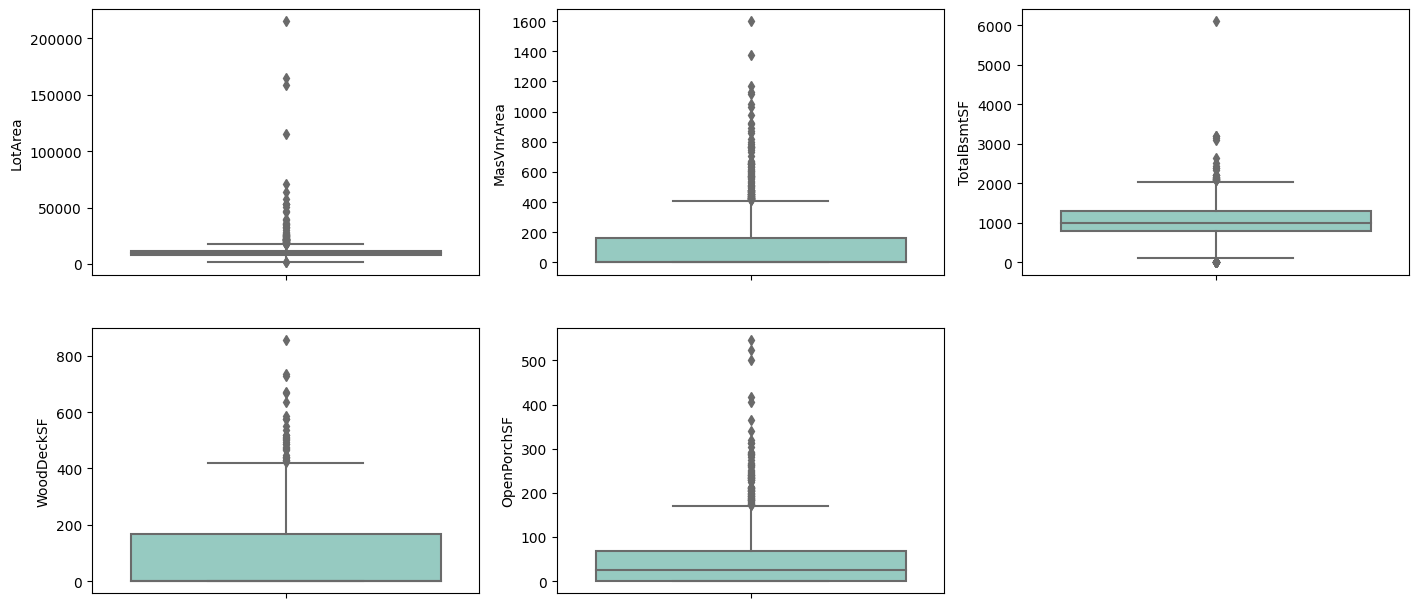

In [22]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = housingInfo)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = housingInfo)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = housingInfo)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = housingInfo)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = housingInfo)
plt.show()

In [23]:
# Removing Outliers

# Removing values beyond 98% for LotArea

nn_quartile_LotArea = housingInfo['LotArea'].quantile(0.98)
housingInfo = housingInfo[housingInfo["LotArea"] < nn_quartile_LotArea]

# Removing values beyond 98% for MasVnrArea

nn_quartile_MasVnrArea = housingInfo['MasVnrArea'].quantile(0.98)
housingInfo = housingInfo[housingInfo["MasVnrArea"] < nn_quartile_MasVnrArea]

# Removing values beyond 99% for TotalBsmtSF

nn_quartile_TotalBsmtSF = housingInfo['TotalBsmtSF'].quantile(0.99)
housingInfo = housingInfo[housingInfo["TotalBsmtSF"] < nn_quartile_TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF

nn_quartile_WoodDeckSF = housingInfo['WoodDeckSF'].quantile(0.99)
housingInfo = housingInfo[housingInfo["WoodDeckSF"] < nn_quartile_WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF

nn_quartile_OpenPorchSF = housingInfo['OpenPorchSF'].quantile(0.99)
housingInfo = housingInfo[housingInfo["OpenPorchSF"] < nn_quartile_OpenPorchSF]

In [24]:
housingInfo['MSSubClass'] = housingInfo['MSSubClass'].astype('object')
housingInfo['OverallQual'] = housingInfo['OverallQual'].astype('object')
housingInfo['OverallCond'] = housingInfo['OverallCond'].astype('object')
housingInfo['BsmtFullBath'] = housingInfo['BsmtFullBath'].astype('object')
#['BsmtHalfBath'] = housingInfo['BsmtHalfBath'].astype('object')
housingInfo['FullBath'] = housingInfo['FullBath'].astype('object')
housingInfo['HalfBath'] = housingInfo['HalfBath'].astype('object')
housingInfo['BedroomAbvGr'] = housingInfo['BedroomAbvGr'].astype('object')
#housingInfo['KitchenAbvGr'] = housingInfo['KitchenAbvGr'].astype('object')
housingInfo['TotRmsAbvGrd'] = housingInfo['TotRmsAbvGrd'].astype('object')
housingInfo['Fireplaces'] = housingInfo['Fireplaces'].astype('object')
housingInfo['GarageCars'] = housingInfo['GarageCars'].astype('object')
#housingInfo['MoSold'] = housingInfo['MoSold'].astype('object')

In [25]:
# Determine the percentage of data retained

num_data = round(100*(len(housingInfo)/1460),2)
print(num_data)

93.01


## Step 3: Data Visualization

In [26]:
num_vars=housingInfo.select_dtypes(exclude=['object'])

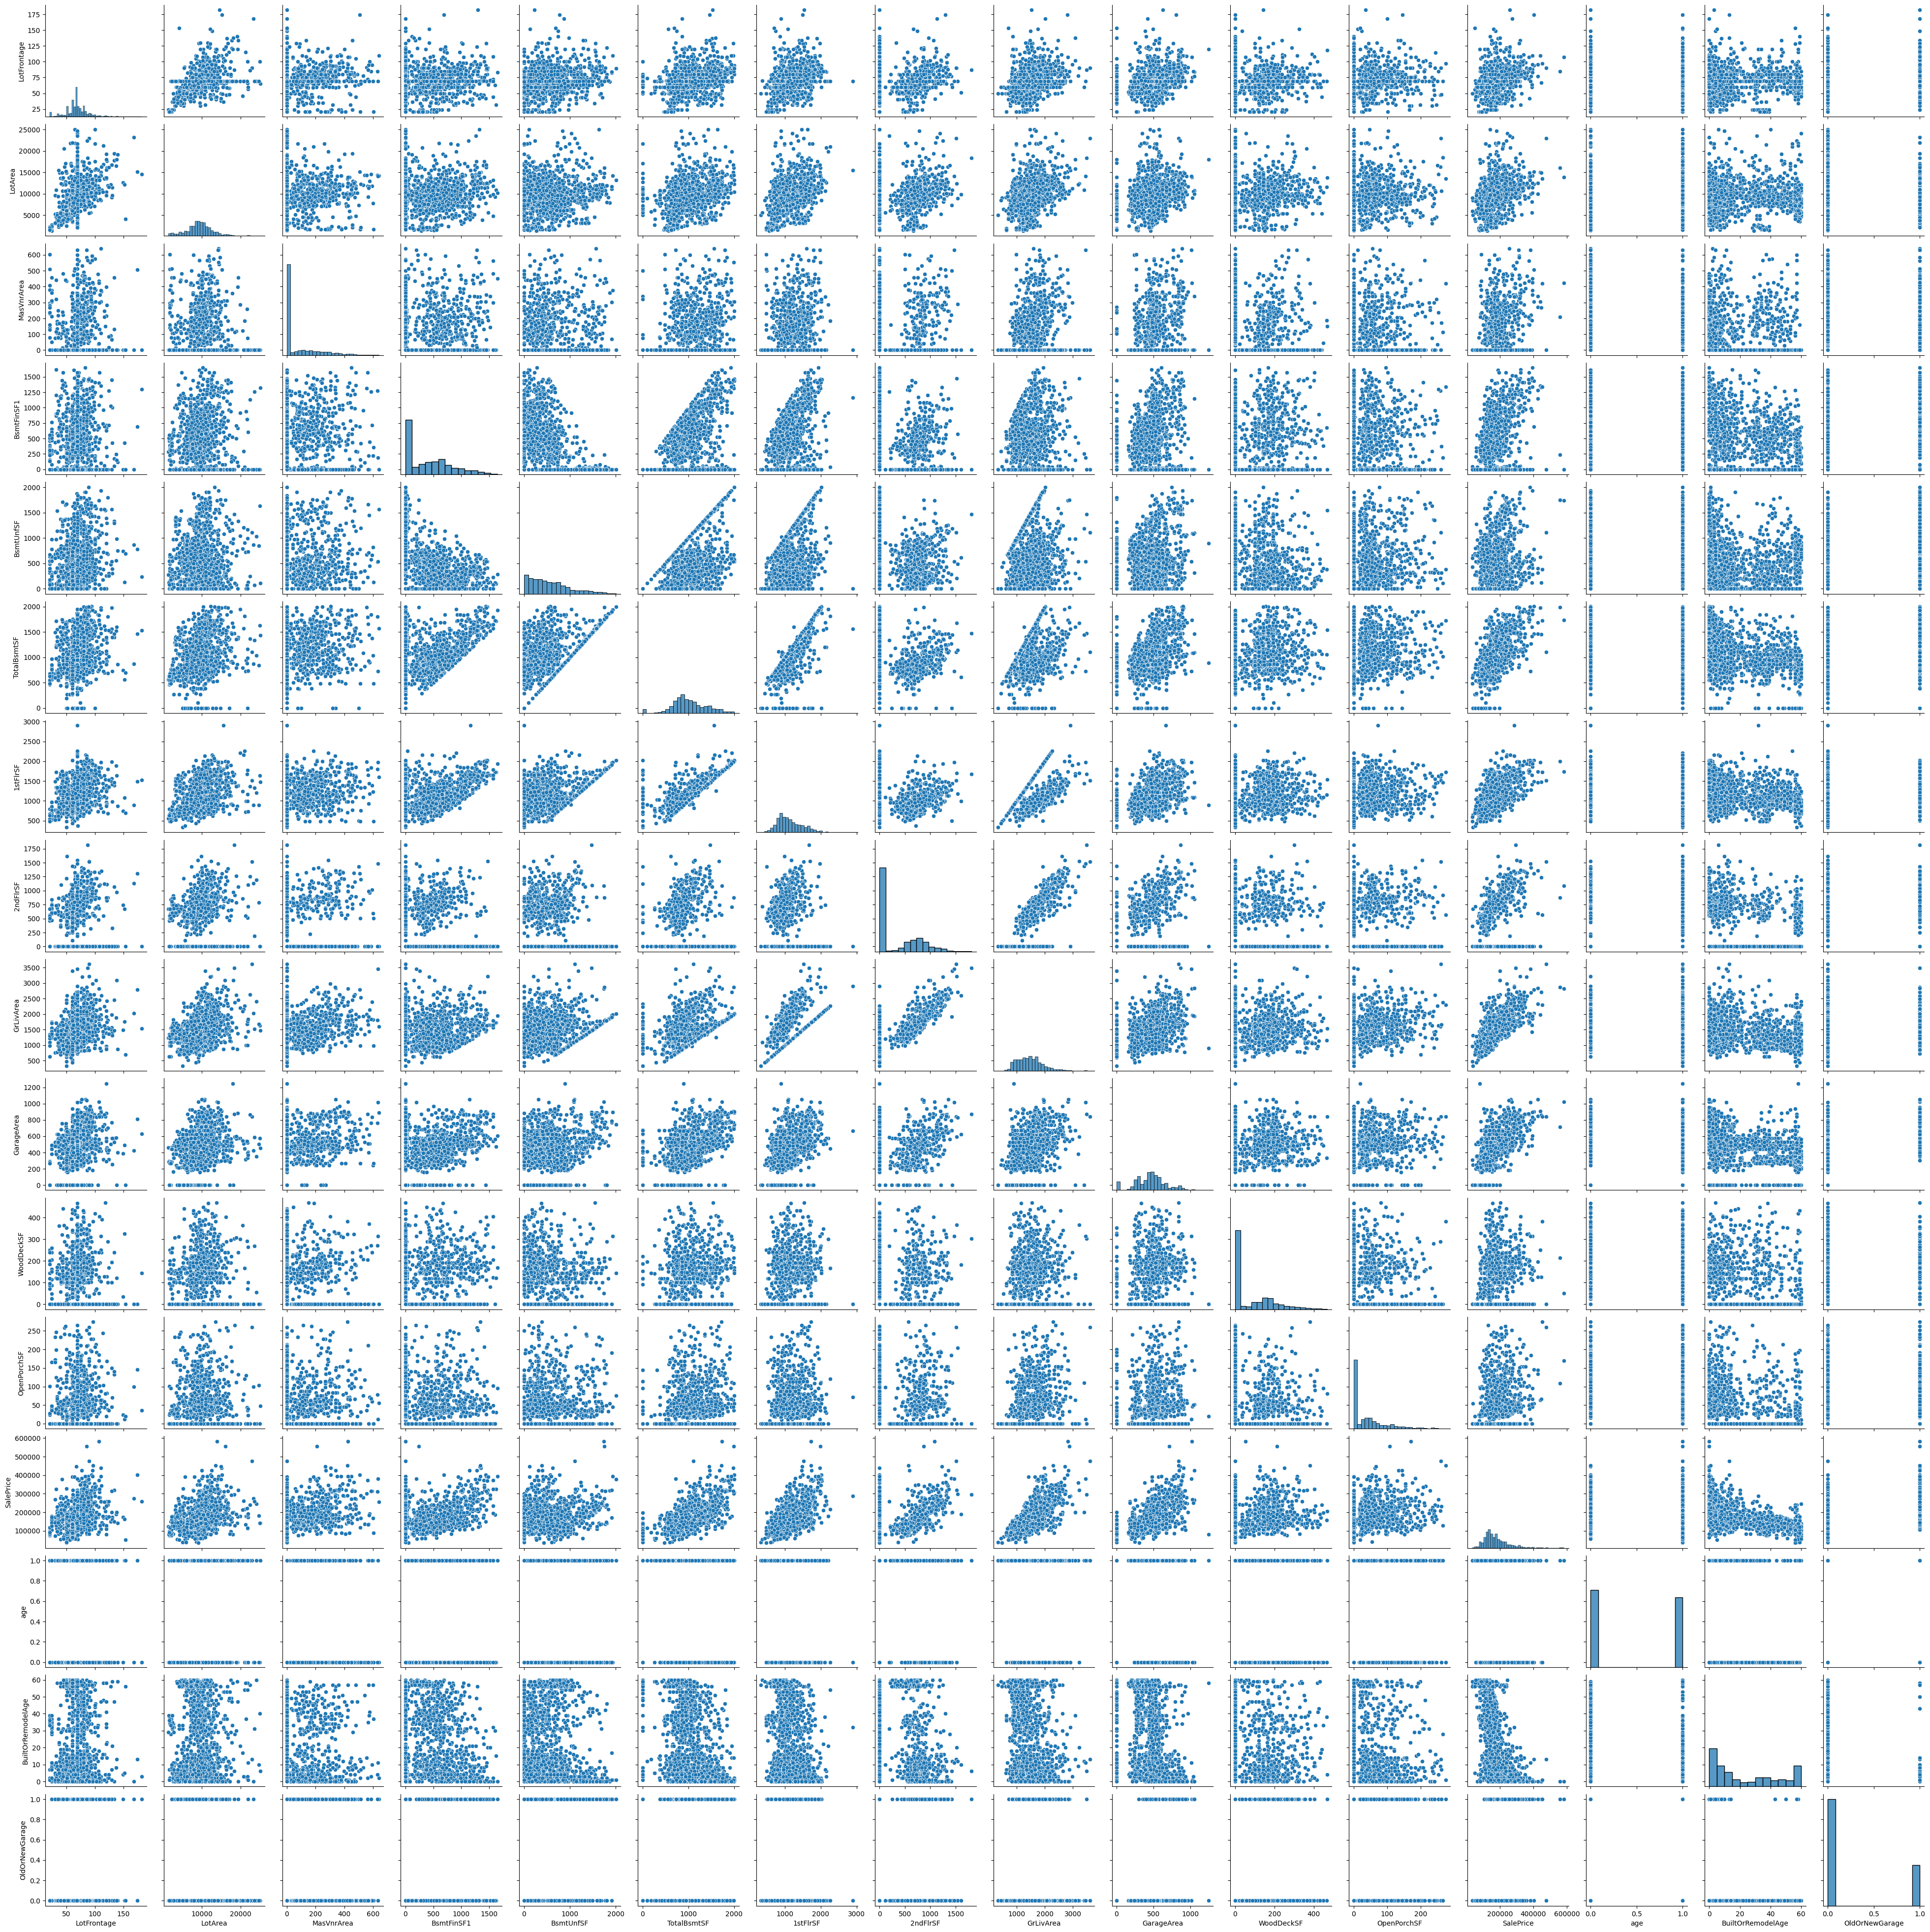

In [27]:
plt=sns.pairplot(num_vars)

The target value seems to be normalized with some noise.

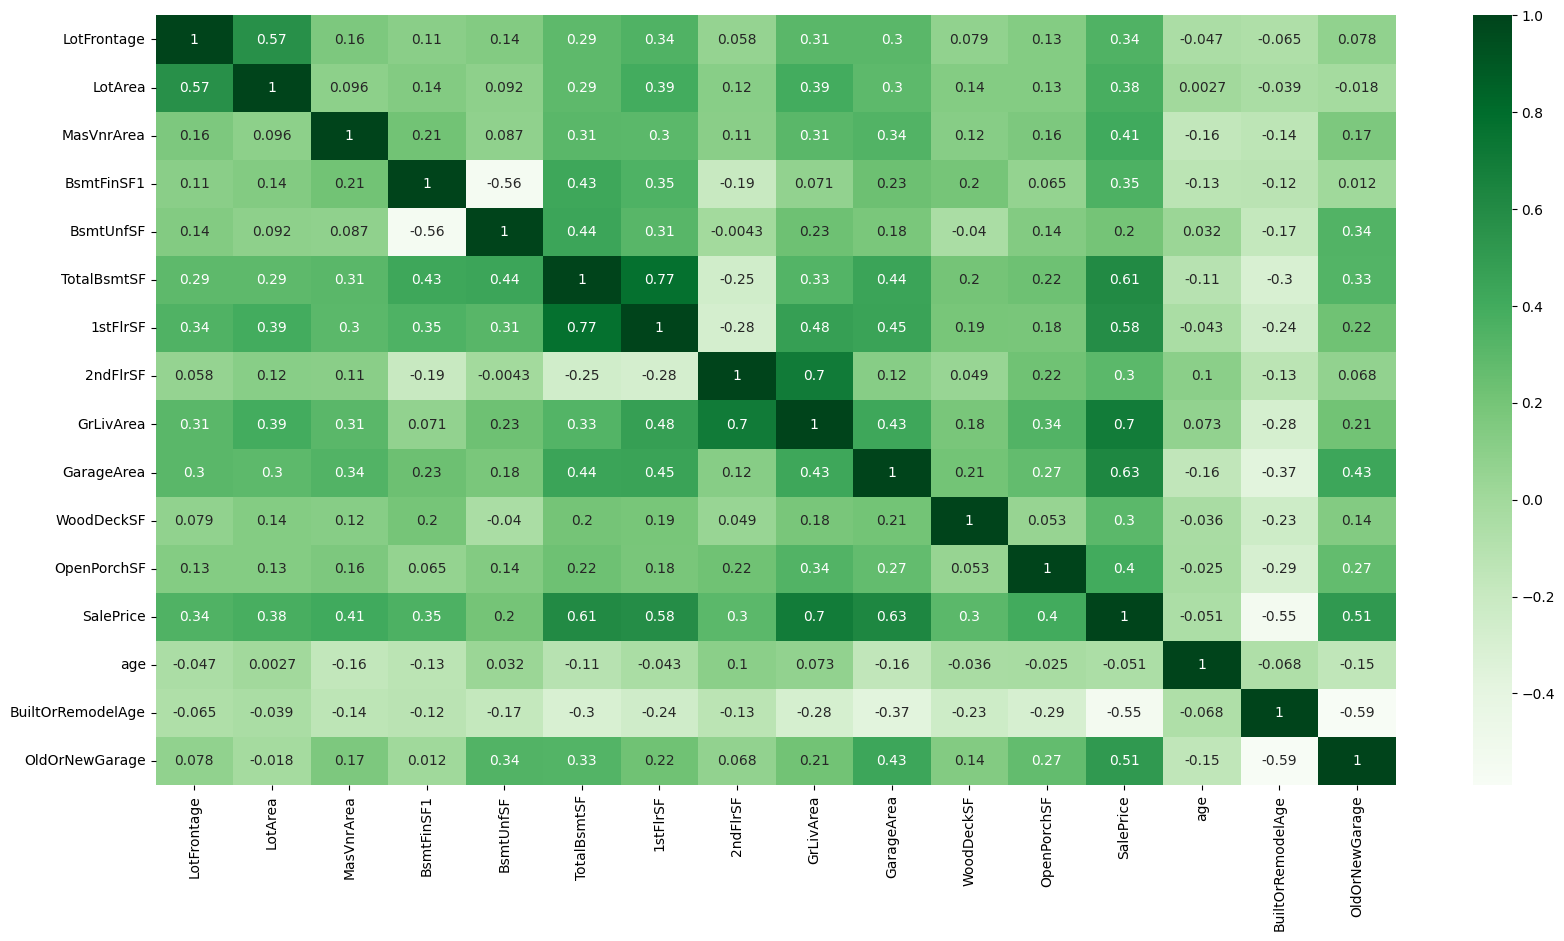

In [30]:
# Check the correlation of numerical columns

plt.figure(figsize = (20, 10))
sns.heatmap(housingInfo.corr(), annot = True, cmap="Greens")
plt.show()

In [31]:
num_vars=housingInfo.select_dtypes(include=['int64', 'float'])

In [32]:
# Check the shape of the dataframe

housingInfo.shape

(1358, 48)

In [33]:
housingInfo.select_dtypes(include=['int64', 'float'])

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0            65.0     8450       196.0         706        150          856   
1            80.0     9600         0.0         978        284         1262   
2            68.0    11250       162.0         486        434          920   
3            60.0     9550         0.0         216        540          756   
4            84.0    14260       350.0         655        490         1145   
...           ...      ...         ...         ...        ...          ...   
1454         62.0     7500         0.0         410        811         1221   
1455         62.0     7917         0.0           0        953          953   
1456         85.0    13175       119.0         790        589         1542   
1457         66.0     9042         0.0         275        877         1152   
1458         68.0     9717         0.0          49          0         1078   

      1stFlrSF  2ndFlrSF  GrLivArea  GarageArea  WoodDeckSF  OpenPorchSF  \
0          856       854       1710         548           0           61   
1         1262         0       1262         460         298            0   
2          920       866       1786         608           0           42   
3          961       756       1717         642           0           35   
4         1145      1053       2198         836         192           84   
...        ...       ...        ...         ...         ...          ...   
1454      1221         0       1221         400           0          113   
1455       953       694       1647         460           0           40   
1456      2073         0       2073         500         349            0   
1457      1188      1152       2340         252           0           60   
1458      1078         0       1078         240         366            0   

      SalePrice  age  BuiltOrRemodelAge  OldOrNewGarage  
0        208500    0                  5               1  
1        181500    0                 31               0  
2        223500    1                  6               1  
3        140000    1                 36               0  
4        250000    0                  8               1  
...         ...  ...                ...             ...  
1454     185000    1                  4               1  
1455     175000    1                  7               0  
1456     210000    1                 22               0  
1457     266500    1                  4               0  
1458     142125    1                 14               0  

[1358 rows x 16 columns]

In [34]:
housingInfo['age'].value_counts()

0    713
1    645
Name: age, dtype: int64

## Step 4: Data Preparation

  - Creating Dummies

In [35]:
num_vars.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'SalePrice', 'age', 'BuiltOrRemodelAge',
       'OldOrNewGarage'],
      dtype='object')

In [36]:
house_categorical = housingInfo.select_dtypes(include=['object'])

In [37]:
house_dum = pd.get_dummies(house_categorical, drop_first=True)

In [38]:
housingInfo=housingInfo.drop(list(house_categorical.columns), axis=1)

In [39]:
housingInfo = pd.concat([housingInfo, house_dum], axis=1)

In [40]:
housingInfo

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0            65.0     8450       196.0         706        150          856   
1            80.0     9600         0.0         978        284         1262   
2            68.0    11250       162.0         486        434          920   
3            60.0     9550         0.0         216        540          756   
4            84.0    14260       350.0         655        490         1145   
...           ...      ...         ...         ...        ...          ...   
1454         62.0     7500         0.0         410        811         1221   
1455         62.0     7917         0.0           0        953          953   
1456         85.0    13175       119.0         790        589         1542   
1457         66.0     9042         0.0         275        877         1152   
1458         68.0     9717         0.0          49          0         1078   

      1stFlrSF  2ndFlrSF  GrLivArea  GarageArea  ...  GarageCars_4  \
0          856       854       1710         548  ...             0   
1         1262         0       1262         460  ...             0   
2          920       866       1786         608  ...             0   
3          961       756       1717         642  ...             0   
4         1145      1053       2198         836  ...             0   
...        ...       ...        ...         ...  ...           ...   
1454      1221         0       1221         400  ...             0   
1455       953       694       1647         460  ...             0   
1456      2073         0       2073         500  ...             0   
1457      1188      1152       2340         252  ...             0   
1458      1078         0       1078         240  ...             0   

      Fence_GdWo  Fence_MnPrv  Fence_MnWw  Fence_None  SaleCondition_AdjLand  \
0              0            0           0           1                      0   
1              0            0           0           1                      0   
2              0            0           0           1                      0   
3              0            0           0           1                      0   
4              0            0           0           1                      0   
...          ...          ...         ...         ...                    ...   
1454           0            0           0           1                      0   
1455           0            0           0           1                      0   
1456           0            1           0           0                      0   
1457           0            0           0           0                      0   
1458           0            0           0           1                      0   

      SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                        0                     0                     1   
1                        0                     0                     1   
2                        0                     0                     1   
3                        0                     0                     0   
4                        0                     0                     1   
...                    ...                   ...                   ...   
1454                     0                     0                     1   
1455                     0                     0                     1   
1456                     0                     0                     1   
1457                     0                     0                     1   
1458                     0                     0                     1   

      SaleCondition_Partial  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  
...                     ...  
1454                      0  
1455                      0  
1456                      0  
1457                      0  
1458                      0  

[1358 rows x 215 

All columns in the data set are now numeric !!!

## Step 5: Train Test Split

In [41]:
# Putting all feature variable to y

y = housingInfo.pop('SalePrice')


In [42]:
# Putting response variable to X

X = housingInfo
#y.head()

#### Scaling the features

In [43]:
# split into train and test

#from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

In [44]:
X_train.shape

(950, 214)

In [45]:
y_train.shape

(950,)

In [46]:
num_vars.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'SalePrice', 'age', 'BuiltOrRemodelAge',
       'OldOrNewGarage'],
      dtype='object')

In [47]:
scaler = MinMaxScaler()
num_var=['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'age']

X_train[num_var]=scaler.fit_transform(X_train[num_var])

In [48]:
X_test[num_var]=scaler.transform(X_test[num_var])

## Step 5: Recursive feature elimination (RFE)¶

    Since there are around 111 features, we will use RFE to get the best 50 features out of the 111 features and use the new
    features for further analysis

In [49]:
# Running RFE with the output number of the variable equal to 50

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm,n_features_to_select=50)
rfe = rfe.fit(X_train, y_train)

In [50]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

Variable  rfe_support  rfe_ranking
0              BsmtFinSF1         True            1
1             TotalBsmtSF         True            1
2               GrLivArea         True            1
3           MSSubClass_90         True            1
4    Neighborhood_Crawfor         True            1
5         BldgType_Duplex         True            1
6       HouseStyle_2.5Unf         True            1
7           OverallQual_2         True            1
8           OverallQual_3         True            1
9           OverallQual_4         True            1
10          OverallQual_5         True            1
11          OverallQual_6         True            1
12          OverallQual_7         True            1
13          OverallQual_8         True            1
14          OverallQual_9         True            1
15         OverallQual_10         True            1
16          OverallCond_2         True            1
17          OverallCond_3         True            1
18          OverallCond_4         True            1
19          OverallCond_5         True            1
20          OverallCond_6         True            1
21          OverallCond_7         True            1
22          OverallCond_8         True            1
23          OverallCond_9         True            1
24    Exterior1st_BrkComm         True            1
25     Exterior1st_CBlock         True            1
26     Exterior1st_Stucco         True            1
27     Exterior2nd_CBlock         True            1
28     Exterior2nd_Stucco         True            1
29          BsmtQual_None         True            1
30      BsmtFinType1_None         True            1
31         BsmtFullBath_3         True            1
32         BedroomAbvGr_5         True            1
33         BedroomAbvGr_8         True            1
34         TotRmsAbvGrd_3         True            1
35         TotRmsAbvGrd_4         True            1
36         TotRmsAbvGrd_5         True            1
37         TotRmsAbvGrd_6         True            1
38         TotRmsAbvGrd_7         True            1
39         TotRmsAbvGrd_8         True            1
40         TotRmsAbvGrd_9         True            1
41        TotRmsAbvGrd_10         True            1
42        TotRmsAbvGrd_11         True            1
43        TotRmsAbvGrd_12         True            1
44        TotRmsAbvGrd_14         True            1
45        GarageType_None         True            1
46      GarageFinish_None         True            1
47           GarageCars_3         True            1
48           GarageCars_4         True            1
49  SaleCondition_Partial         True            1

In [51]:
# Assign the 50 columns to X_train_rfe

X_train_rfe = X_train[col]

In [52]:
# Associate the new 50 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

## Step 6: Model Building and Evaluation

#### Ridge

In [53]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
# list pf alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [54]:
GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [55]:
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 0.2}
-18055.257524525143


In [56]:
alpha = 0.2
ridge = Ridge(alpha=alpha)
ridge.fit(X_train_rfe, y_train)
ridge.coef_

array([ 48679.66844318,  62643.23637166, 176329.92560276, -15383.59366638,
        25212.05593479, -15383.59366638, -46033.62621419, -35910.44833315,
       -35061.8465596 , -33803.32391655, -29008.56672181, -15566.37837064,
         6800.26213787,  40284.22300619,  81356.77023638, 107145.12941149,
       -28315.72971488, -17794.53601564, -13985.31878196,   6129.54894766,
         6915.95602814,  13788.88855925,  12215.36504077,  21045.82593668,
       -23315.88626447, -11518.37221774,  30973.99889557, -11518.37221774,
       -39089.62639508,  15463.72366122,  15463.72366122,  51214.83860802,
       -44324.32422096, -26833.77931943,  15491.94954554,  13948.34289133,
         8170.4749548 ,   7431.26568086,   4315.59938409,   6728.80785612,
         6441.95755276,   6362.08363241,   9411.15939435,  34767.95931736,
       -26833.77931943,  -7411.43920692,  -7411.43920692,  21434.25755772,
        14575.95003015,  28027.20241381])

In [57]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8810288579575475
0.843660833927554
534987017125.9552
274435734221.74838
563144228.553637
672636603.4846774


In [58]:
ridge_pred = ridge.predict(X_test)


<Axes: xlabel='SalePrice', ylabel='Density'>

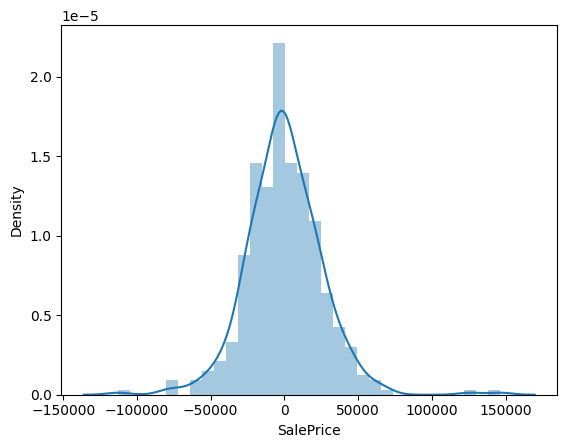

In [59]:
y_res=y_test-ridge_pred
# Distribution of errors
sns.distplot(y_res,kde=True)


Lasso model

In [77]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [78]:
GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [79]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 50}
-18003.110046651236


In [80]:
alpha =50

lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

Lasso(alpha=50)

In [81]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)



0.8780086523403146
0.8524629680496181
548568216453.21643
258984582720.86627
577440227.8454909
634766134.1197703


In [64]:
lasso_pred = lasso.predict(X_test)


<Axes: xlabel='SalePrice', ylabel='Density'>

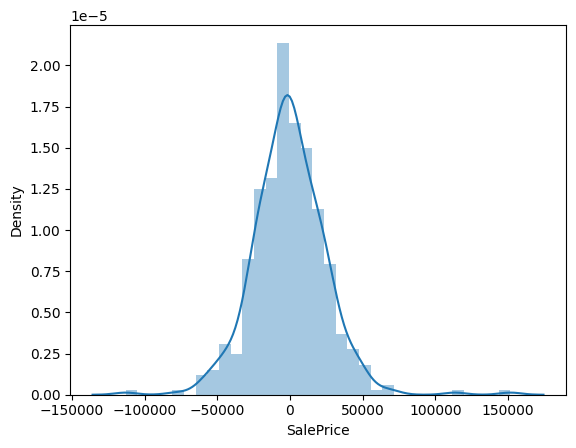

In [65]:
y_res=y_test-lasso_pred
# Distribution of errors
sns.distplot(y_res,kde=True)


In [66]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.head(68)


Lasso
BsmtFinSF1             4.986748e+04
TotalBsmtSF            5.910221e+04
GrLivArea              1.701453e+05
MSSubClass_90         -2.574217e+04
Neighborhood_Crawfor   2.444919e+04
BldgType_Duplex       -0.000000e+00
HouseStyle_2.5Unf     -3.810383e+04
OverallQual_2         -0.000000e+00
OverallQual_3         -1.815318e+04
OverallQual_4         -1.804317e+04
OverallQual_5         -1.336726e+04
OverallQual_6         -0.000000e+00
OverallQual_7          2.237481e+04
OverallQual_8          5.629598e+04
OverallQual_9          9.760986e+04
OverallQual_10         1.195265e+05
OverallCond_2         -3.032478e+04
OverallCond_3         -2.326773e+04
OverallCond_4         -1.923961e+04
OverallCond_5         -0.000000e+00
OverallCond_6          0.000000e+00
OverallCond_7          6.665033e+03
OverallCond_8          4.492721e+03
OverallCond_9          1.357276e+04
Exterior1st_BrkComm   -0.000000e+00
Exterior1st_CBlock    -0.000000e+00
Exterior1st_Stucco     1.146488e+04
Exterior2nd_CBlock    -0.000000e+00
Exterior2nd_Stucco    -1.812806e+04
BsmtQual_None          2.473315e+04
BsmtFinType1_None      1.043439e-09
BsmtFullBath_3         8.016720e+03
BedroomAbvGr_5        -3.957542e+04
BedroomAbvGr_8        -1.130407e+04
TotRmsAbvGrd_3         1.560767e+03
TotRmsAbvGrd_4         3.981115e+03
TotRmsAbvGrd_5         0.000000e+00
TotRmsAbvGrd_6        -3.416658e+02
TotRmsAbvGrd_7        -2.474681e+03
TotRmsAbvGrd_8        -2.779704e+02
TotRmsAbvGrd_9         0.000000e+00
TotRmsAbvGrd_10       -0.000000e+00
TotRmsAbvGrd_11        0.000000e+00
TotRmsAbvGrd_12        2.444601e+04
TotRmsAbvGrd_14       -2.995325e+03
GarageType_None       -1.438250e+04
GarageFinish_None     -4.418127e-12
GarageCars_3           2.139581e+04
GarageCars_4           2.049925e+03
SaleCondition_Partial  2.795236e+04

Subjective question 1 answer when the alpha is doubled

Ridge alpha doubled

In [67]:
alpha = 0.4
ridge = Ridge(alpha=alpha)
ridge.fit(X_train_rfe, y_train)
ridge.coef_

array([ 49161.74088492,  62657.57515049, 169753.90447547, -15245.64937127,
        25252.06740125, -15245.64937127, -44326.63568299, -33157.68622251,
       -37647.4027994 , -37006.54594541, -32294.59873772, -18627.4910058 ,
         3869.90625743,  37344.3778282 ,  77503.19921372,  99998.37450561,
       -27743.68034267, -18763.47271519, -13894.57907521,   6239.50528284,
         6934.72979977,  13763.85626267,  12128.32462742,  21335.31616037,
       -20297.47957634, -10436.44301128,  27955.24919381, -10436.44301128,
       -35786.60528022,  15193.45469861,  15193.45469861,  43851.11826971,
       -43084.51609653, -24225.16841626,  10302.64795803,   9675.95490877,
         4261.1232577 ,   3783.94800112,   1226.09024832,   3980.09889901,
         4423.42461508,   4791.07225325,   7695.94044192,  34067.00092718,
       -24225.16841626,  -7548.58305425,  -7548.58305425,  21763.22738636,
        13685.30188592,  27943.9625879 ])

In [68]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8806108308194063
0.8449437364446095
536866793077.27
272183743866.11407
565122940.0813369
667117019.2796913


Lasso is doubled

In [69]:
alpha =100

lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

Lasso(alpha=100)

In [70]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)




0.8746968609902264
0.8558487865745212
563460612586.5161
253041161016.84595
593116434.3015959
620198924.0608969


checking predictor with high coeffeicent



GrLivArea,OverallQual_10,OverallQual_9,TotalBsmtSF,BsmtFinSF1

In [71]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.head(68)

Lasso
BsmtFinSF1             5.038483e+04
TotalBsmtSF            5.616601e+04
GrLivArea              1.668156e+05
MSSubClass_90         -2.195593e+04
Neighborhood_Crawfor   2.347147e+04
BldgType_Duplex       -0.000000e+00
HouseStyle_2.5Unf     -2.845354e+04
OverallQual_2         -0.000000e+00
OverallQual_3         -1.627568e+04
OverallQual_4         -1.798459e+04
OverallQual_5         -1.342158e+04
OverallQual_6         -0.000000e+00
OverallQual_7          2.206376e+04
OverallQual_8          5.615429e+04
OverallQual_9          9.642269e+04
OverallQual_10         1.122547e+05
OverallCond_2         -2.278684e+04
OverallCond_3         -1.907789e+04
OverallCond_4         -1.833533e+04
OverallCond_5          0.000000e+00
OverallCond_6         -0.000000e+00
OverallCond_7          6.011714e+03
OverallCond_8          3.050970e+03
OverallCond_9          1.219070e+04
Exterior1st_BrkComm   -0.000000e+00
Exterior1st_CBlock    -0.000000e+00
Exterior1st_Stucco     0.000000e+00
Exterior2nd_CBlock    -0.000000e+00
Exterior2nd_Stucco    -5.693154e+03
BsmtQual_None          1.938994e+04
BsmtFinType1_None      8.160015e-10
BsmtFullBath_3         0.000000e+00
BedroomAbvGr_5        -3.433486e+04
BedroomAbvGr_8        -0.000000e+00
TotRmsAbvGrd_3         0.000000e+00
TotRmsAbvGrd_4         2.575408e+03
TotRmsAbvGrd_5         0.000000e+00
TotRmsAbvGrd_6        -1.459016e+02
TotRmsAbvGrd_7        -1.684415e+03
TotRmsAbvGrd_8        -0.000000e+00
TotRmsAbvGrd_9         0.000000e+00
TotRmsAbvGrd_10        0.000000e+00
TotRmsAbvGrd_11        0.000000e+00
TotRmsAbvGrd_12        1.871580e+04
TotRmsAbvGrd_14       -0.000000e+00
GarageType_None       -1.457610e+04
GarageFinish_None     -3.313595e-12
GarageCars_3           2.219127e+04
GarageCars_4           0.000000e+00
SaleCondition_Partial  2.792857e+04

Subjecttive q4 . Dropping the predictor predicted earlier

In [72]:
X1_train=X_train.drop(['GrLivArea','OverallQual_10','OverallQual_9','TotalBsmtSF','BsmtFinSF1'],axis=1)
X1_test = X_test.drop(['GrLivArea','OverallQual_10','OverallQual_9','TotalBsmtSF','BsmtFinSF1'],axis=1)


In [73]:
alpha =50

lasso = Lasso(alpha=alpha)

lasso.fit(X1_train, y_train)

Lasso(alpha=50)

In [74]:
y_pred_train = lasso.predict(X1_train)
y_pred_test = lasso.predict(X1_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)


0.7717991229517078
0.7364966268655598
1026169072782.6179
462550386398.6809
1080177971.3501241
1133701927.4477472


In [75]:
betas = pd.DataFrame(index=X1_train.columns)
betas.rows = X1_train.columns
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.head(68)


Lasso
MSSubClass_90         -1.281555e+04
Neighborhood_Crawfor   3.744371e+04
BldgType_Duplex       -4.864344e+02
HouseStyle_2.5Unf     -5.544446e+04
OverallQual_2         -1.630543e+05
OverallQual_3         -1.614744e+05
OverallQual_4         -1.638871e+05
OverallQual_5         -1.510882e+05
OverallQual_6         -1.294422e+05
OverallQual_7         -9.584275e+04
OverallQual_8         -4.353502e+04
OverallCond_2         -3.068522e+04
OverallCond_3         -4.389343e+04
OverallCond_4         -1.872779e+04
OverallCond_5          0.000000e+00
OverallCond_6         -0.000000e+00
OverallCond_7          3.259726e+03
OverallCond_8          0.000000e+00
OverallCond_9          2.093407e+03
Exterior1st_BrkComm    0.000000e+00
Exterior1st_CBlock    -0.000000e+00
Exterior1st_Stucco     0.000000e+00
Exterior2nd_CBlock    -0.000000e+00
Exterior2nd_Stucco    -1.155454e+04
BsmtQual_None         -1.505503e+04
BsmtFinType1_None     -5.996585e-10
BsmtFullBath_3         4.222817e+04
BedroomAbvGr_5        -2.520578e+04
BedroomAbvGr_8         3.132034e+03
TotRmsAbvGrd_3        -1.499808e+04
TotRmsAbvGrd_4        -1.342487e+04
TotRmsAbvGrd_5        -6.435927e+03
TotRmsAbvGrd_6        -0.000000e+00
TotRmsAbvGrd_7         7.037910e+03
TotRmsAbvGrd_8         1.302964e+04
TotRmsAbvGrd_9         2.831261e+04
TotRmsAbvGrd_10        3.801672e+04
TotRmsAbvGrd_11        5.637413e+04
TotRmsAbvGrd_12        9.981267e+04
TotRmsAbvGrd_14        1.545246e+04
GarageType_None       -2.545652e+04
GarageFinish_None     -2.775136e-11
GarageCars_3           3.088442e+04
GarageCars_4           6.921082e+03
SaleCondition_Partial  2.224377e+04

New preditor using Laso model for the predictor variable

TotRmsAbvGrd_12,Neighborhood_Crawfor,BsmtFullBath_3,SaleCondition_Partial,GarageCars_3




